## Movie Poster Neural Network Classification

** Import libraries**

In [1]:
# ! pip install tqdm
# ! pip install tensorflow
# ! pip install cv2
# ! pip install keras

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2


In [1]:
import pandas as pd
import os

In [2]:
import numpy as np

In [3]:
import time
from tqdm import tqdm

In [4]:
import tensorflow as tf
import cv2
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

Using TensorFlow backend.


In [5]:
import matplotlib.pyplot as plt

** Read in cleaned dataset as pandas dataframe**

In [6]:
movie = pd.read_pickle('/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Top6.pkl')

** Only read in image files that match the titles in the cleaned dataset**

In [7]:
titles = movie.Title.tolist()

In [8]:
len(titles)

17444

We only want to save the image files that are part of our cleaned, processed data set. 

In [9]:
x = []
x_titles = []
for name in tqdm((os.listdir("/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"))):
    sb = "/Users/michael/Documents/UCSB_2017-2018/PSTAT 134/134MHCP/Images/"+name
    s = name[:-4]
    x_titles.append(s)
    if(s in titles):
        img = cv2.imread(sb)
        x.append(img)

100%|██████████| 37873/37873 [00:40<00:00, 927.06it/s]


In [10]:
## Check length of x and titles make sure that it matches
len(x)

17444

** Drop Title column and keep only One-Hot encoding to use as labels**

We do this to save computational time and keep our multi-label classification more simple

In [11]:
movie = movie.reset_index(drop = True)

In [12]:
movie.head(5)

,Title,Action,Comedy,Crime,Horror,Romance,Thriller
0,#chicagoGirl: The Social Network Takes on a Di...,1,0,0,0,0,0
1,#Horror (2015),0,0,0,1,0,0
2,#Pellichoopulu (2016),0,1,0,0,1,0
3,'71 (2014),1,0,0,0,0,1
4,'D' (2005),0,0,1,0,0,1


In [13]:
df = movie.drop(movie.columns[0], axis=1)

In [14]:
df.head(5)

,Action,Comedy,Crime,Horror,Romance,Thriller
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,1,0
3,1,0,0,0,0,1
4,0,0,1,0,0,1


** Set up x and y to be split up and used for model**

Stack the array as our model needs a 4d array consisting of 3d arrays

In [15]:
y = df.values

In [16]:
x = np.stack(x)

In [17]:
print(x.shape)
print(y.shape)

(17444, 268, 182, 3)
(17444, 6)


We have 17,444 images and their labels. 268 is the height of the image and 182 is the width of the image in pixels. Each pixel is represented by an array that denotes its BGR values. The 6 is the number of classes we want to classify the data into.

** Split dataset into test and train sets**

In [18]:
from sklearn.cross_validation import train_test_split

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
seed = 9

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state = seed)

In [21]:
input_shape = x_train[0].shape
num_class = y_train.shape[1]
print(input_shape)
print(num_class)

(268, 182, 3)
6


** Create 7 layer convolutional neural network**

Binary_crossentropy is our loss function. Our model's operation looks like this: a numpy array that contains the image is fed into the model. It is then run through the layers until the end where a percentage is spit out to show how likely the model thinks the image is part of that genre. We used Adam as it is very efficient as an optimizer and can save us processing time.

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 2
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 3
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 4
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# layer 5
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 6
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# layer 7
model.add(Dense(num_class))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

**Run the Model**

In [23]:
# model.fit(x_train, y_train,
#           batch_size=32, epochs=100, verbose=1)

** Load saved model**

In [24]:
from keras.models import load_model

In [25]:
model = load_model('model_one_hundred_epochs.h5')

**Prediction stuff**

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 266, 180, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 266, 180, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 90, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 88, 32)       9248      
_________________________________________________________________
activation_2 (Activation)    (None, 131, 88, 32)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 44, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 42, 32)        9248      
__________

In [27]:
prediction = model.predict(x_test)

** Example prediction**

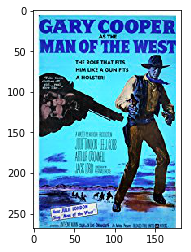

In [28]:
plt.imshow(x_test[900])

In [29]:
print(prediction[900])

[3.2331874e-07 3.9677134e-01 7.7243967e-06 8.7635368e-01 5.1774081e-02
 1.6432631e-01]


In [30]:
print(y_test[810])

[0 0 0 1 0 0]


**Test Prediction**

In [31]:
evaluate = model.evaluate(x_test,y_test)
print(evaluate)
print(model.metrics_names)

5234/5234 [==============================] - 70s 13ms/step
[1.5219087376592721, 0.6915679620247922]
['loss', 'acc']


**Confusion Matrix**

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
pred_values = []

In [34]:
threshhold = .5
unclassified = 0
for i in range(len(prediction)):
    pred_true = []
    for j in range(len(prediction[i])):
        if(prediction[i][j] >=threshhold):
            pred_true.append(1)
        else:
            pred_true.append(0)
    if(sum(pred_true)== 0):
        unclassified+=1
    pred_values.append(pred_true)

In [35]:
y_test_non_cat = [np.argmax(t)for t in y_test]
y_pred_non_cat = [np.argmax(t) for t in pred_values]

In [36]:
conf_mat = confusion_matrix(y_test_non_cat,y_pred_non_cat)

In [37]:
import seaborn

In [38]:
df_confusion = pd.DataFrame(confusion_matrix(y_test_non_cat,y_pred_non_cat))

In [39]:
labels = ['Action','Comedy','Crime','Horror','Romance','Thriller']

In [40]:
df_confusion.columns = labels

In [41]:
df_confusion[''] = labels

In [42]:
cols = df_confusion.columns.tolist()
cols = cols[-1:] + cols[:-1]

In [43]:
df_confusion = df_confusion[cols] 

In [44]:
df_confusion

,,Action,Comedy,Crime,Horror,Romance,Thriller
0,Action,508,214,119,165,199,93
1,Comedy,521,125,86,93,122,83
2,Crime,335,139,90,101,123,70
3,Horror,317,133,79,91,117,83
4,Romance,317,130,80,86,118,69
5,Thriller,172,67,47,55,58,29


In [45]:
labels

['Action', 'Comedy', 'Crime', 'Horror', 'Romance', 'Thriller']

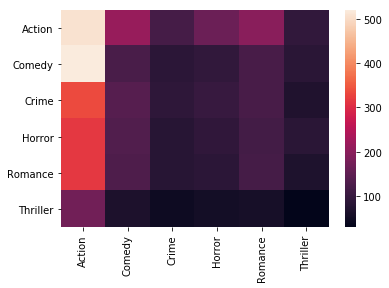

In [46]:
conf_heatmap = seaborn.heatmap(conf_mat,xticklabels=True, yticklabels=True)
conf_heatmap.set_xticklabels(labels, rotation=90)
conf_heatmap.set_yticklabels(labels,rotation = 360)
plt.show()